#  Sequence coverage from the Malva Index

## 1. Login and Connecting to the Malva Index

From the previous notebook `00_setup_malva_client.ipynb`, paste here the `API_TOKEN` you generated from your user profile in [https://malva.mdc-berlin.de](https://malva.mdc-berlin.de)

In [ ]:
API_TOKEN = "" # place your token here

Then, you are ready to use the `malva_client` Python package to access the Malva Index programatically.

In [ ]:
import dnaio
from malva_client import MalvaClient
from malva_client.tools import mask_sequence

client = MalvaClient("https://malva.mdc-berlin.net", API_TOKEN)

INFO:malva_client.client:Connected to Malva API: healthy
INFO:malva_client.client:Authenticated successfully: free account


## 2. Querying the Malva Index

The true power of Malva lies in enabling sequence searches across our harmonized index of >7,000 single-cell and spatial transcriptomics samples. This unprecedented scale enables:

- **Cross-study comparisons**: Identify expression patterns across diverse experimental conditions
- **Rare event detection**: Find low-frequency sequences that would be missed in individual studies
- **Metadata-driven analysis**: Leverage rich sample annotations for targeted queries
- **Real-time quantification**: Instantaneous results without reprocessing raw data

Each query returns not just expression levels, but complete provenance information linking back to the original cells and samples for downstream analysis.

### 2.1 Coverage Data Analysis

Now let's analyze expression coverage across a genomic region

In [ ]:
coverage = client.get_coverage('chrX', 73_802_599, 73_870_805, strand='positive') # coverage for XIST (should be sex-specific)
print(coverage)

INFO:malva_client.client:Coverage analysis submitted with job ID: 9e3279e1-3ad2-4c70-ad69-191a3df456f4


🧬 Malva Coverage Results
📍 Region: chrX:73,802,599-73,870,805 (68,206 bp)
📊 Positions: 1,000
🧪 Samples: 132
📈 Coverage range: 0.000 - 38.217
📊 Mean coverage: 0.007
🔬 Cell types: 118
✅ Sample-level data available
🔬 Cell types detected: 118

ℹ️  Basic coverage data only
💡 Run .enrich_with_metadata() to add sample metadata for filtering by:
   • Organ, disease, species
   • Study, laboratory, protocol
   • Age, sex, development stage

🔍 Available methods (inherited from CoverageDataFrame):
   • .filter_by(organ='brain', cell_type='neuron')
   • .aggregate_by('cell_type')
   • .plot_expression_by('cell_type')  # plots coverage
   • .plot_coverage_summary('organ')
   • .available_fields()  # see all available fields
   • .available_filter_fields()  # see filterable fields
   • .filter_by_position(start=1000, end=2000)


In [4]:
coverage.enrich_with_metadata()

✓ Enriched with metadata for 132 samples


Region:,"chrX:73,802,599-73,870,805 (68,206 bp)"
Positions:,"1,000"
Samples:,132
Coverage range:,0.000 - 38.217
Mean coverage:,0.007
Cell types:,118
Data type:,Sample-level data available


/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:956: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_groups = self._df.groupby(group_by)['coverage'].mean().nlargest(limit).index


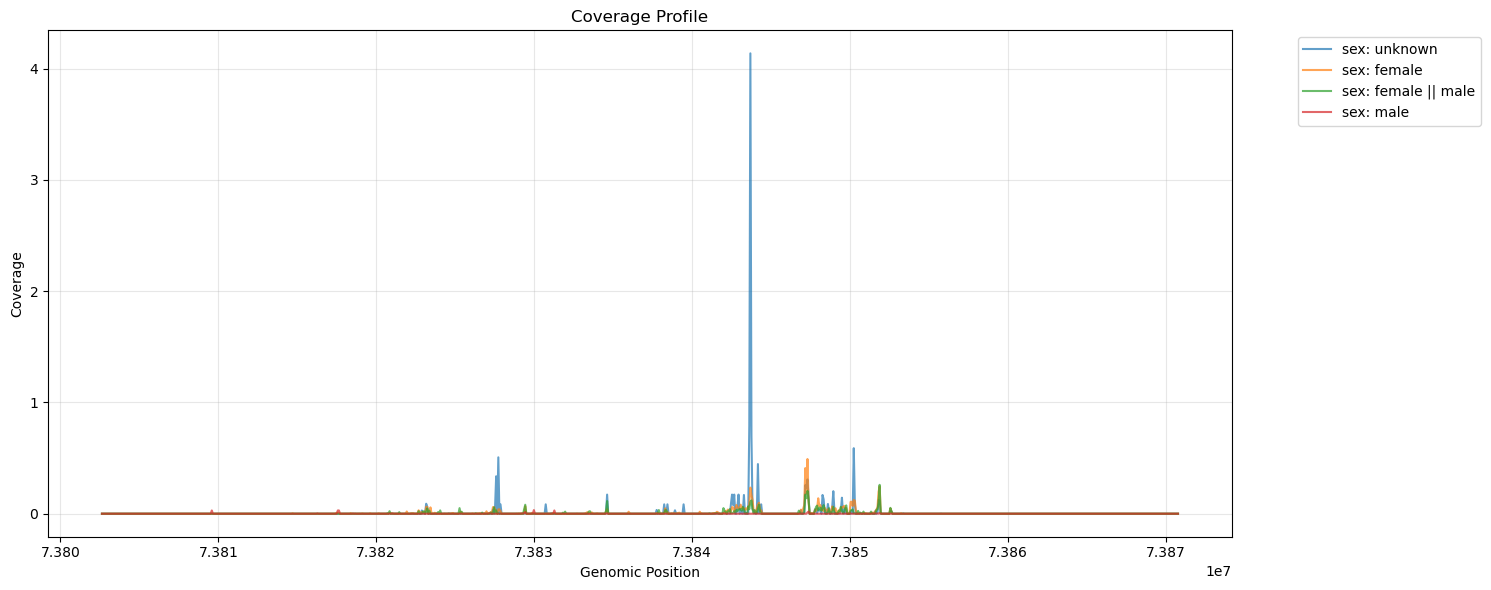

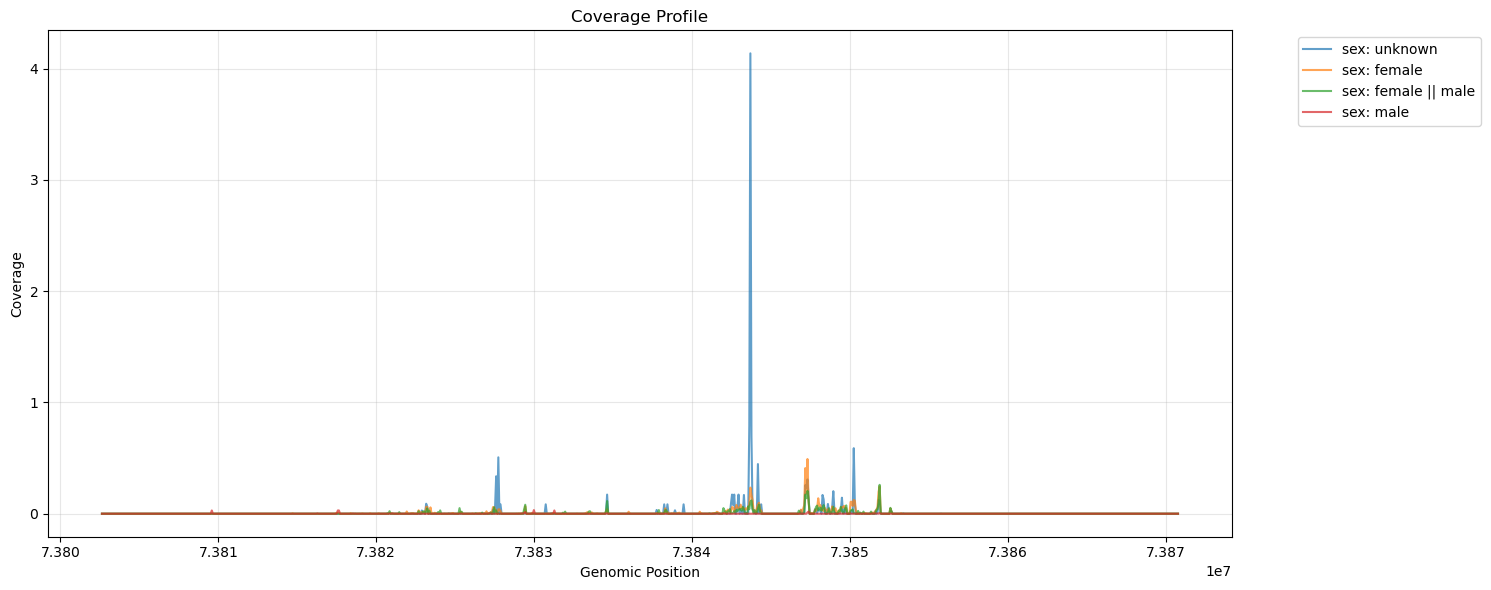

In [13]:
coverage.plot_coverage_profile("sex")

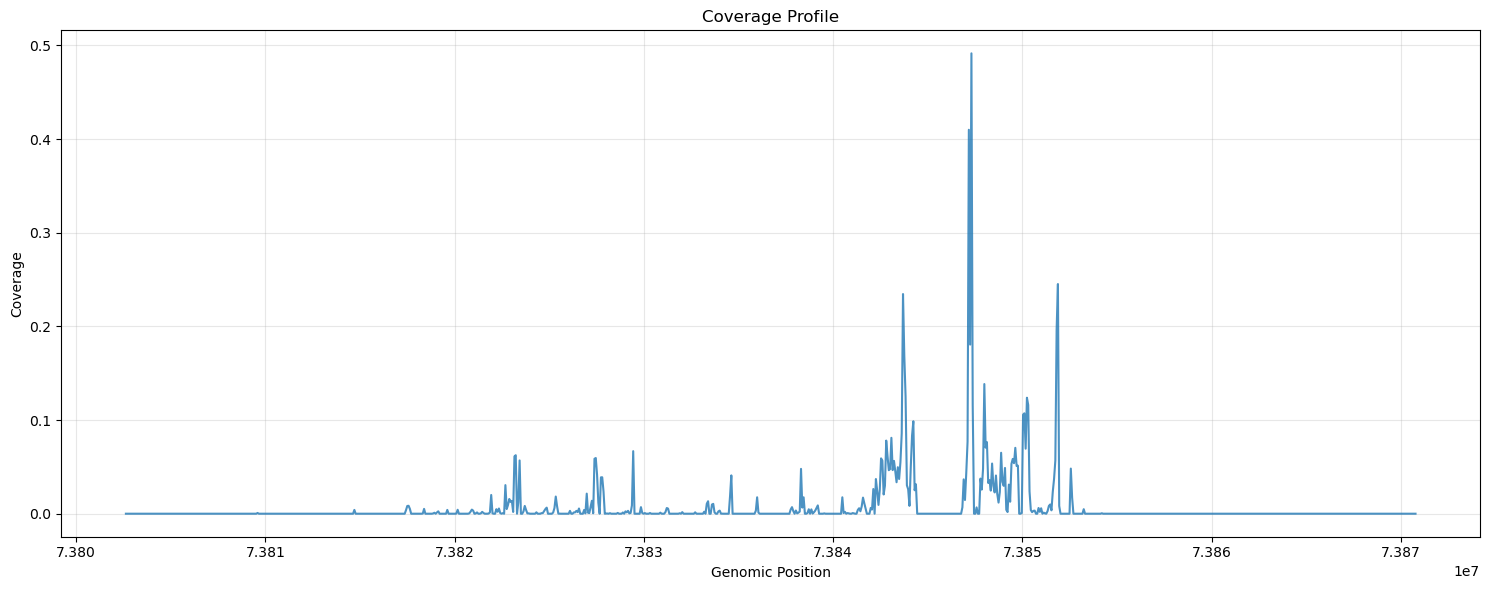

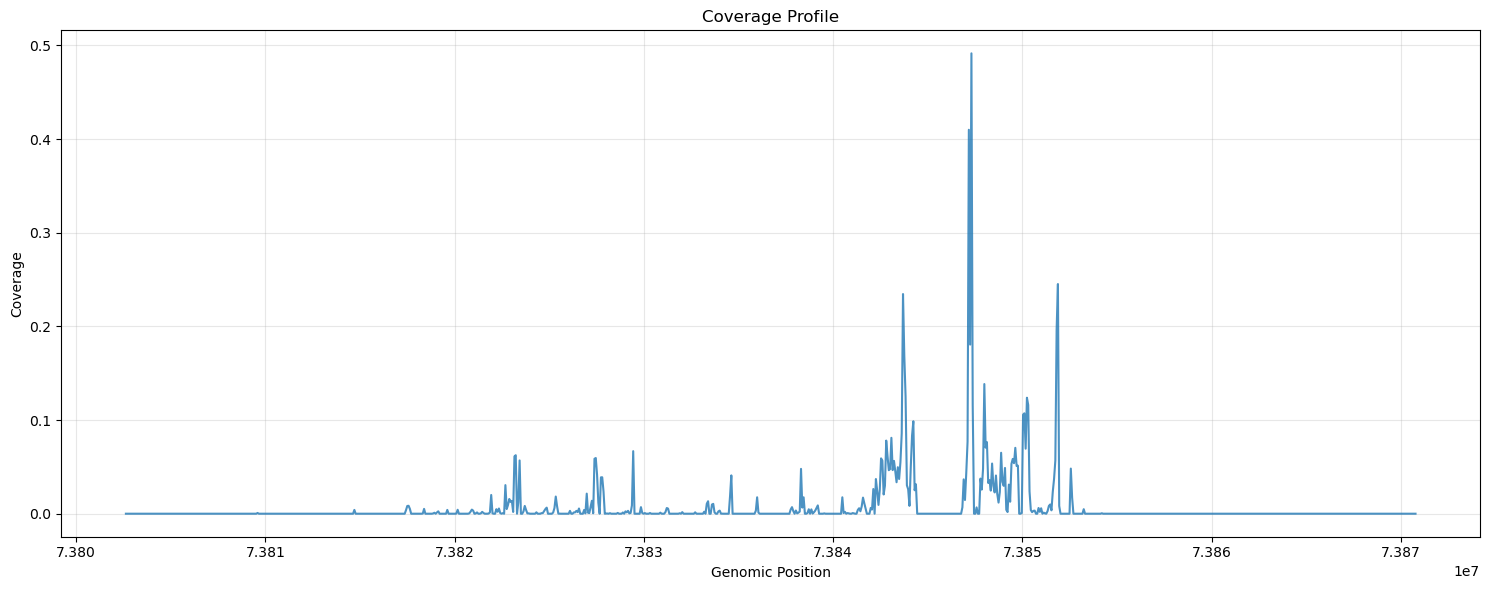

In [5]:
female_coverage = coverage.filter_by(sex='female')
female_coverage.plot_coverage_profile()

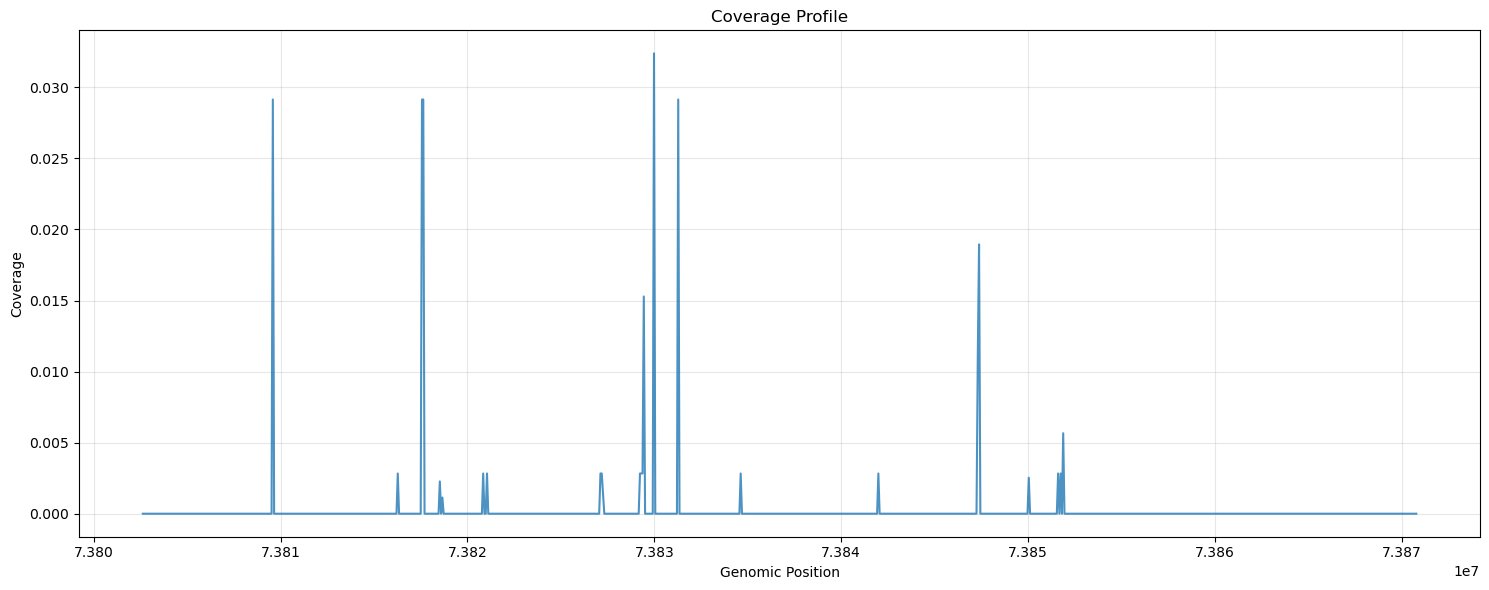

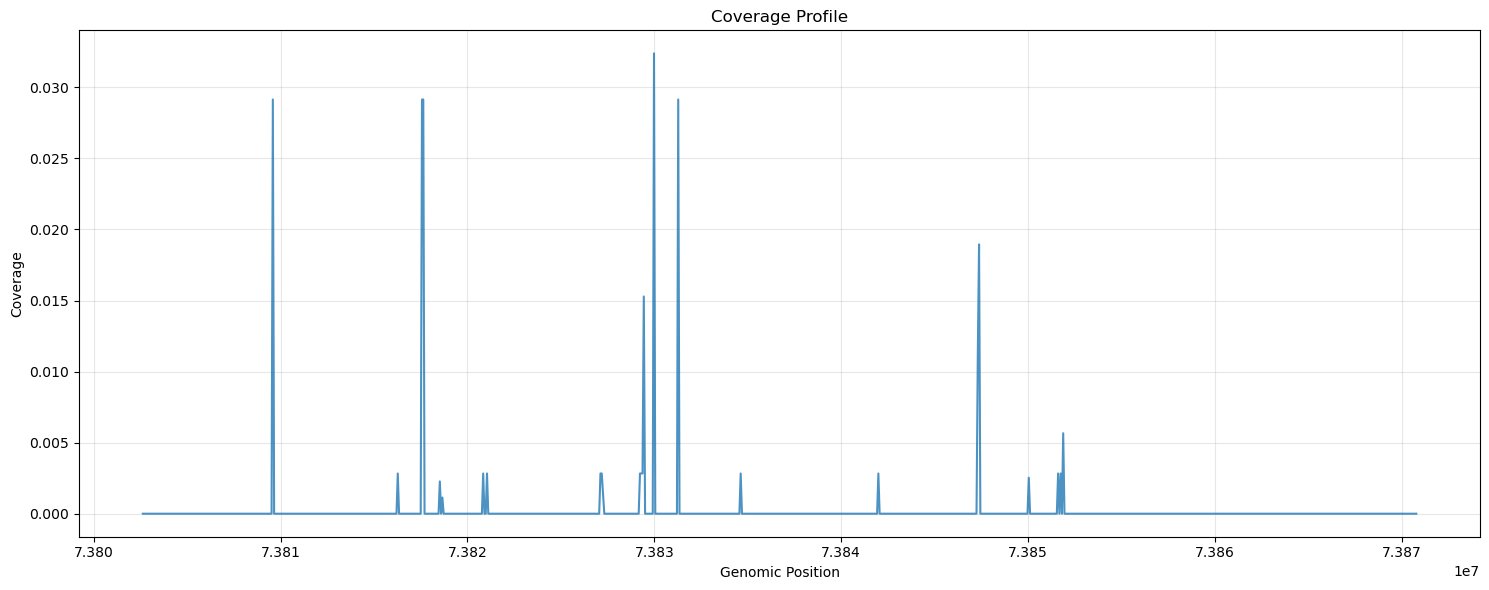

In [6]:
male_coverage = coverage.filter_by(sex='male')
male_coverage.plot_coverage_profile()

/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:1235: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_groups = self._df.groupby(group_by)['coverage'].mean().nlargest(limit).index.tolist()
/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:1246: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_counts = plot_data.groupby(group_by)['sample_id'].nunique().reindex(top_groups)
/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:1261: FutureWarning: The default of


📊 Coverage Summary by Sex:
--------------------------------------------------
unknown: 7 samples, 1000 positions, μ=0.012
female: 97 samples, 1000 positions, μ=0.007
female || male: 22 samples, 1000 positions, μ=0.004
male: 6 samples, 1000 positions, μ=0.000


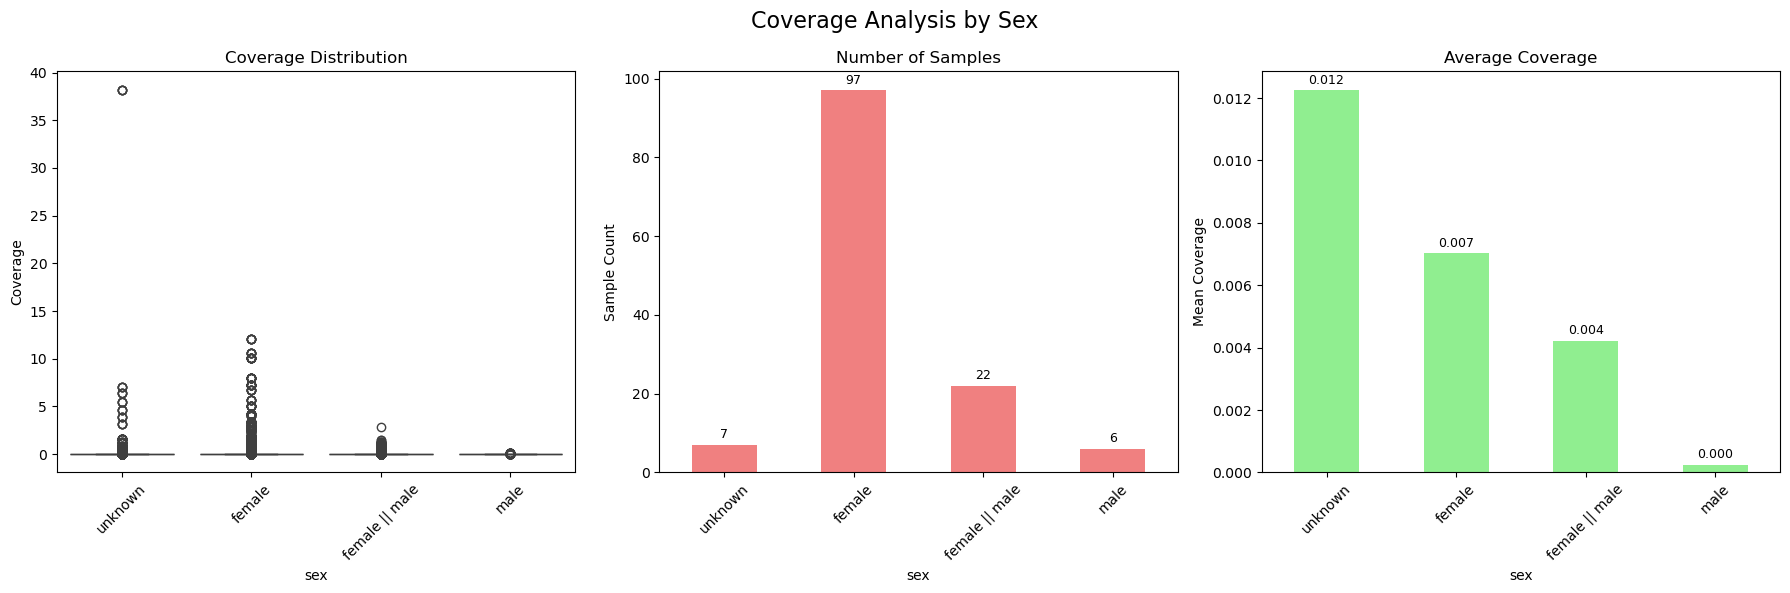

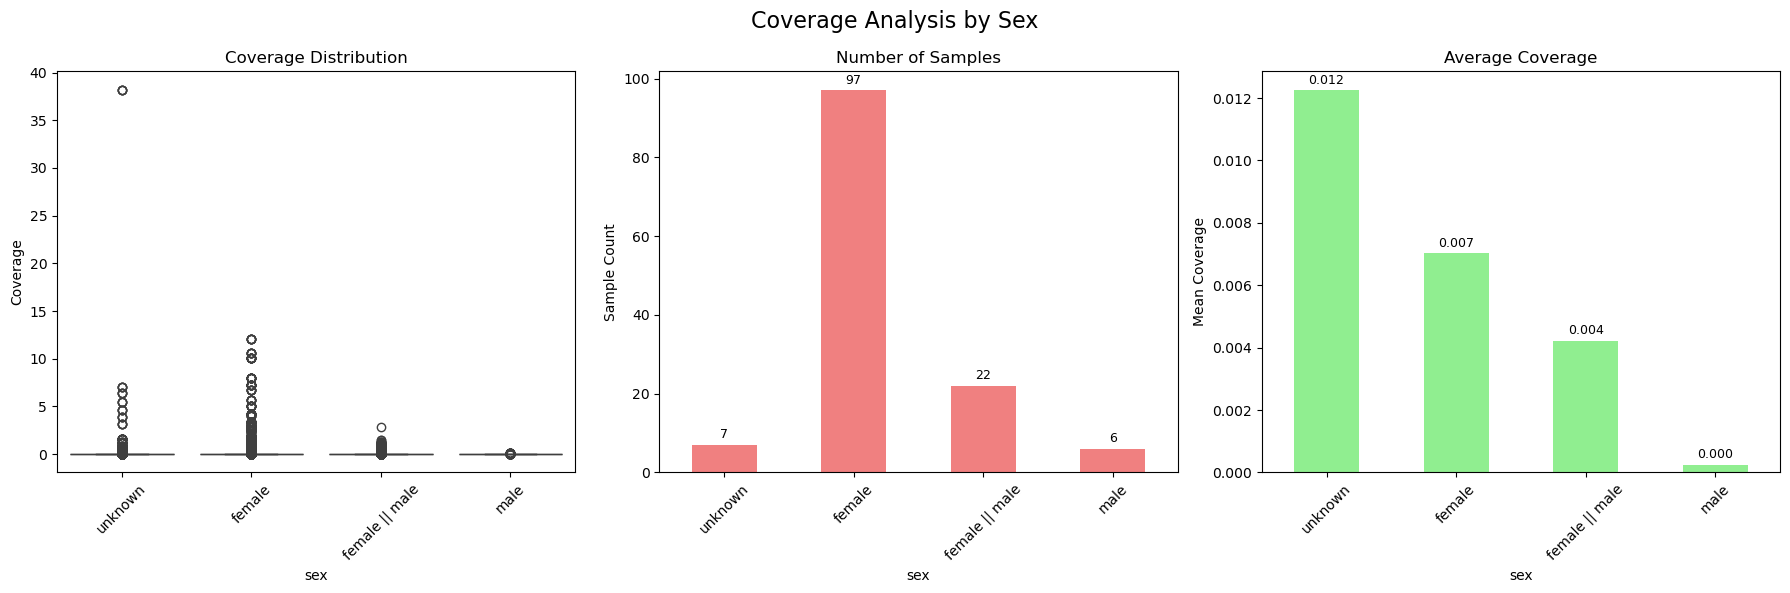

In [11]:
coverage.plot_coverage_summary("sex")